In [5]:
%matplotlib inline
import numpy as np
import pylab as plt
from SNR_Computations import ANDES
from matplotlib.ticker import FormatStrFormatter

In [6]:
import pandas as pd

In [7]:
andes = ANDES()
andesUBV = ANDES(SPECTRO = 'UBV')


In [8]:
andesUBV.VMAG = np.array([20.0])
andesUBV.EXPTIME = 42.0
andesUBV.WL = np.array([0.550])
print(andesUBV.GetPhotons())
print(andesUBV.GetSkyBackgroundPhotons())

[25.83294015]
[2.926188]


The Light that will be gathered for the EM will come from the F2F interface. and image of the far field of the input fiber is projected on the hexagonal paving of micro/mini lenses.

<img src="attachment:26da7e93-7620-4bc9-babd-68058fc4506b.png" width =400>

* The geometry of light picking for the EM is defined by this figure.
* The intersection of one green hexagon with the circle, has an area ratio of 1.125%. 
* As there are 6 fibers for the Exposure meter the total amount of flux available is 6.75%

This is without accounting for the loss at coupling the EM fibers and the loss of the fiber themselves. Lets take 80% for each these two losses

A note for the spectrograph there are 12 fibers out of 31 that in average receive less flux than the others. These fiber will have 76.36 % of the flux of the other fibers

In [9]:
T_EXPMeter_FL = 0.0675 *0.8 * 0.8 # Flux available from the fiber link geometric flux * 80% for coupling * 80% for fiber transmission
T_EXPMeter_EM = 0.6 # Transmission of the EM optics (QE is taken into account elsewhere)
T_EXPMeter = T_EXPMeter_FL * T_EXPMeter_EM

In [10]:
llU   = np.linspace(0.350,0.400,100)
llB   = np.linspace(0.400,0.500,100)
llV   = np.linspace(0.500,0.630,100)
llUBV = np.linspace(0.350,0.630,100)
llR   = np.linspace(0.620,0.750,100)
llIZ  = np.linspace(0.750,0.950,100)
llRIZ = np.linspace(0.620,0.950,100)

# CMOS Detector Characteristics

Here is explored a IMX432 detector from Sony a cmos with 9 micron pixels. We also look at the cooled down version

https://www.univers-astro.fr/en/cooled-for-deep-sky/1140-camera-apollo-m-max-imx432-monochome-player-one.html

https://player-one-astronomy.com/product/apollo-m-max-pro-usb3-0-mono-camera-imx432/

<img src="attachment:c295cb8c-4411-4227-a80f-e24ccb3d2212.png" width="400">

* The peak QE is 79%

There is another QE data available at:
https://thinklucid.com/tech-briefs/sony-4th-generation-pregius-s/
where there is data also below 400nm, but that peak is at 77%. Arto added the points below 400 into the CSV file.

<img src="attachment:14144fef-1b76-455e-b16c-9cfff7896505.png" width =400> <img src ="attachment:b4a832ee-256a-44f0-8cc3-4bfed121b4e9.png" width= 400>

* The minimum read noise is 2.6 e-

<img src="attachment:be043918-3841-405d-b7e3-cc8fa9be10ba.png" width=400>

* at -20° down to 0.3 e-/s

* Exposure time 32 $\mu$s to 2000s

### R2 TODO: add other detector chips

In [11]:
data_QE_IMX = pd.read_csv("rel_QE_IMX432_max_is_79.csv",decimal=",") 

Text(0, 0.5, 'QE')

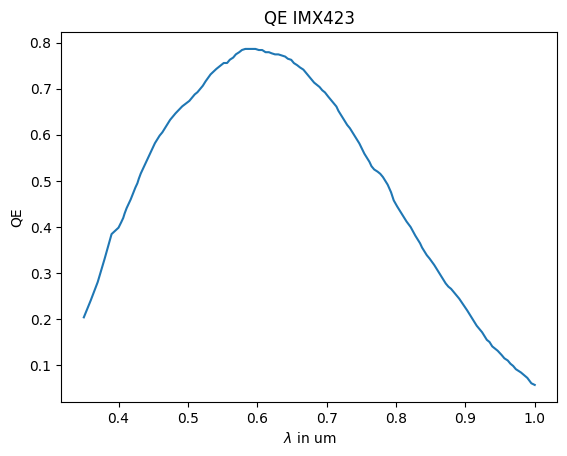

In [12]:
data_QE_IMX["Lambda"] = data_QE_IMX["Lambda"] / 1e3
plt.plot(data_QE_IMX["Lambda"],data_QE_IMX["QE"]*0.79)
plt.title("QE IMX423")
plt.xlabel(r"$\lambda$ in um")
plt.ylabel("QE")

In [13]:
QEIMXU=np.interp(llU,data_QE_IMX["Lambda"],data_QE_IMX["QE"])*0.79
QEIMXB=np.interp(llB,data_QE_IMX["Lambda"],data_QE_IMX["QE"])*0.79
QEIMXV=np.interp(llV,data_QE_IMX["Lambda"],data_QE_IMX["QE"])*0.79
QEIMXUBV=np.interp(llUBV,data_QE_IMX["Lambda"],data_QE_IMX["QE"])*0.79
QEIMXR=np.interp(llR,data_QE_IMX["Lambda"],data_QE_IMX["QE"])*0.79
QEIMXIZ=np.interp(llIZ,data_QE_IMX["Lambda"],data_QE_IMX["QE"])*0.79
QEIMXRIZ=np.interp(llRIZ,data_QE_IMX["Lambda"],data_QE_IMX["QE"])*0.79
print(f"Mean QE in U {QEIMXU.mean()}")
print(f"Mean QE in B {QEIMXB.mean()}")
print(f"Mean QE in V {QEIMXV.mean()}")
print(f"Mean QE in UBV {QEIMXUBV.mean()}")
print(f"Mean QE in R {QEIMXR.mean()}")
print(f"Mean QE in IZ {QEIMXIZ.mean()}")
print(f"Mean QE in RIZ {QEIMXRIZ.mean()}")

Mean QE in U 0.30767657595959597
Mean QE in B 0.558091652308342
Mean QE in V 0.7522655822653632
Mean QE in UBV 0.6026042830122139
Mean QE in R 0.6999418496725012
Mean QE in IZ 0.33731263114469506
Mean QE in RIZ 0.4799039798444721


In [14]:
IMXRON = 2.6 # e-
IMXDARKm20 = 0.3 # e-/s/pix
IMXDARK = 0.73 # e-/s/pix
IMXFullWell = 1e5 # e-

# HAMMAMATSU PMT characteristics

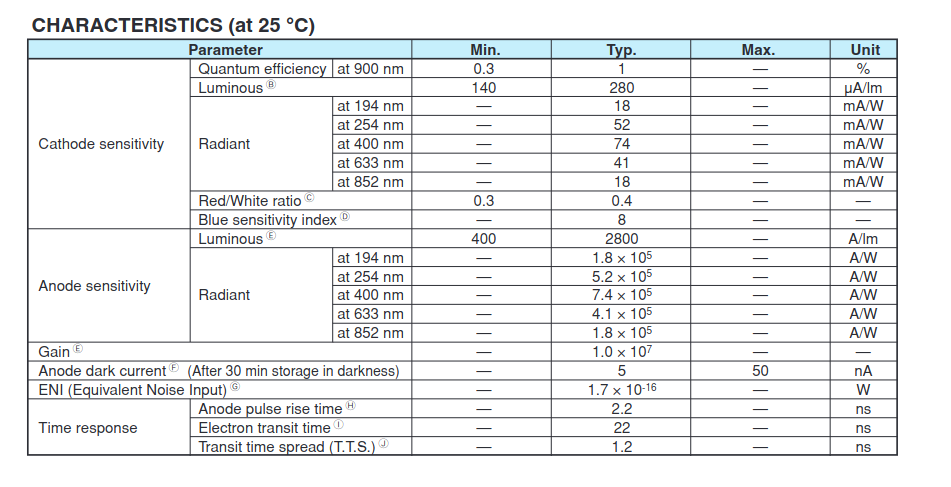

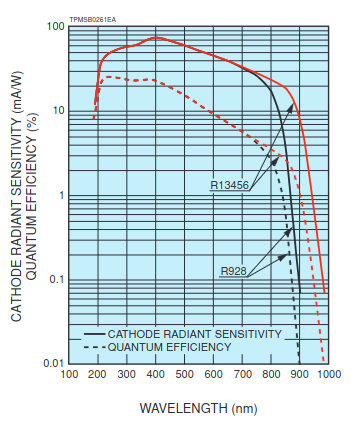

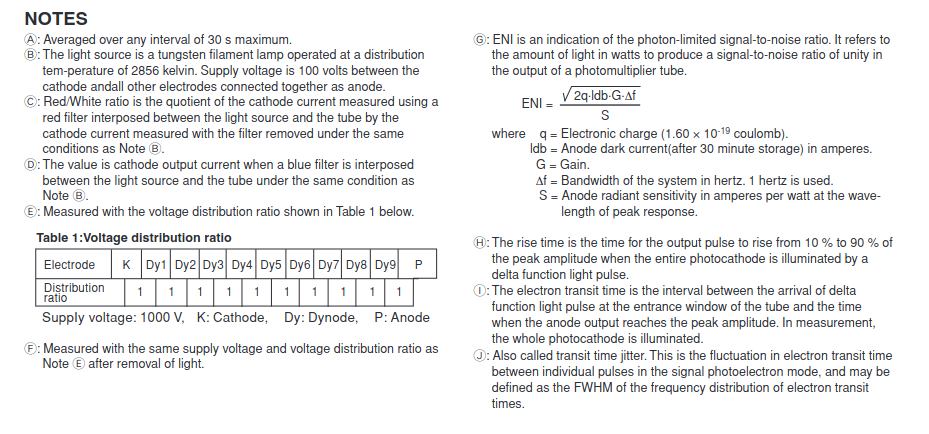

In [15]:
hamma = pd.read_csv("hammatsu_VISNIR_PMT_R13456_radiant.csv",decimal = ",")

In [16]:
QEhamaU=np.interp(llU,hamma["wavelength"],hamma["radiant"])
QEhamaB=np.interp(llB,hamma["wavelength"],hamma["radiant"])
QEhamaV=np.interp(llV,hamma["wavelength"],hamma["radiant"])
QEhamaUBV=np.interp(llUBV,hamma["wavelength"],hamma["radiant"])
QEhamaR=np.interp(llR,hamma["wavelength"],hamma["radiant"])
QEhamaIZ=np.interp(llIZ,hamma["wavelength"],hamma["radiant"])
QEhamaRIZ=np.interp(llRIZ,hamma["wavelength"],hamma["radiant"])

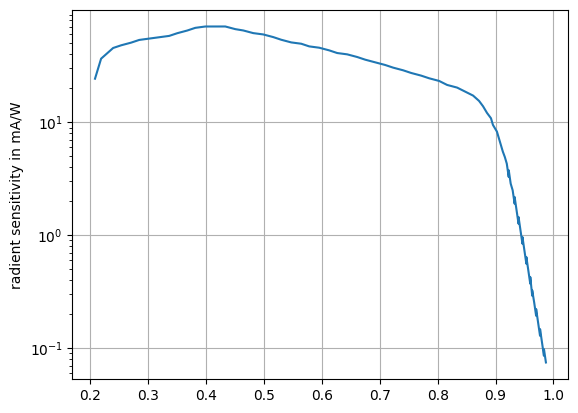

In [17]:
plt.semilogy(hamma["wavelength"]/1000,hamma["radiant"])
plt.ylabel("radient sensitivity in mA/W")
plt.grid()

# Exposure Meter Parameters

Hypothesis : flux is distributed on 6 fibers of diameter 110 microns imaged with the magnification Magnification on the detector

In [18]:
Nfiber = 6
Fiber_diameter = 110 # microns
Magnification = 0.5
Pixel_Size = 9 # microns
Dispersion = 4.

N_pixelsEM = np.pi * ( ( Fiber_diameter / 2.0 ) * Magnification )**2 * Nfiber / Pixel_Size**2 * Dispersion
# print(f"NP = {N_pixelsEM}")
# N_pixelsEM = 100
print(f"Number of Pixels for the Exposure Meter Flux : {N_pixelsEM}")

Number of Pixels for the Exposure Meter Flux : 703.9494649710463


# Computation of the number of Electrons

In [19]:
mag = np.linspace(2,20,num=19)

In [20]:
from tqdm import tqdm

fU = []
fB = []
fV = []
fR = []
fIZ = []
skfU = []
skfB = []
skfV = []
skfR = []
skfIZ=[]

fUBV = []
fRIZ = []
skfUBV = []
skfRIZ = []

fVpho = []
fUBVpho = []
fRIZpho = []

andesUBV = ANDES(SPECTRO = 'UBV')
andes = ANDES(SPECTRO = 'RIZ')

andesEM = ANDES(SPECTRO='EM')
nbins = 5
wl_lin = np.linspace(0.35,0.63,nbins)
wl_log = np.geomspace(0.35,0.63,nbins)
wl_oma = np.array([0.35,0.47,0.53,0.58,0.63])
#nbins = 9
#wl_oma = np.array([0.35,0.43,0.47,0.50,0.53,0.555,0.58,0.605,0.63])

fEM = np.zeros((len(mag),nbins-1))
skEM = np.zeros((len(mag),nbins-1))
andesEM.EXPTIME = 1.
andesEM.RPOW = 3.
for i in tqdm(range(len(mag))):
    andesEM.VMAG = mag[i]
    for j in range(nbins-1):
        wls = np.linspace(wl_oma[j],wl_oma[j+1],100)
        andesEM.WL = wls
        flux = andesEM.GetPhotons()
        skyf = andesEM.GetSkyBackgroundPhotons()
        fEM[i,j] = np.trapz(flux,wls)
        skEM[i,j] = np.trapz(skyf,wls)

for m in tqdm(mag):
    # UBV
    andesUBV.VMAG = m
    andesUBV.EXPTIME = 1.
    andesUBV.RPOW = 3.
    andesUBV.WL = np.array(llU)
    ifU=andesUBV.GetPhotons()
    iskfU=andesUBV.GetSkyBackgroundPhotons()
    andesUBV.WL = np.array(llB)
    ifB=andesUBV.GetPhotons()
    iskfB=andesUBV.GetSkyBackgroundPhotons()
    andesUBV.WL = np.array(llV)
    ifV=andesUBV.GetPhotons()
    iskfV=andesUBV.GetSkyBackgroundPhotons()
    andesUBV.WL = np.array(llUBV)
    ifUBV=andesUBV.GetPhotons()
    iskfUBV=andesUBV.GetSkyBackgroundPhotons()
    # RIZ
    andes.VMAG = m
    andes.EXPTIME = 1.
    andes.RPOW = 3.
    andes.WL = np.array(llR)
    ifR=andes.GetPhotons()
    iskfR=andes.GetSkyBackgroundPhotons()
    andes.WL = np.array(llIZ)
    ifIZ=andes.GetPhotons()
    iskfIZ=andes.GetSkyBackgroundPhotons()
    andes.WL = np.array(llRIZ)
    ifRIZ=andes.GetPhotons()
    iskfRIZ=andes.GetSkyBackgroundPhotons()
    # # EM
    # if m == 20:
    #     andesEM.VMAG = m
    #     andesEM.EXPTIME = 1.
    #     andesEM.RPOW = 3.
    #     for i in range(nbins-1):
    #         wl1 = np.linspace(wl_lin[i],wl_lin[i+1],100)
    #         andesEM.WL = wl1
    #         ibinF1 = andesEM.GetPhotons()
    #         ibinskF1 = andesEM.GetSkyBackgroundPhotons()
    #         wl2 = np.linspace(wl_log[i],wl_log[i+1],100)
    #         andesEM.WL = wl2
    #         ibinF2 = andesEM.GetPhotons()
    #         ibinskF2 = andesEM.GetSkyBackgroundPhotons()
    #         wl3 = np.linspace(wl_oma[i],wl_oma[i+1],100)
    #         andesEM.WL = wl3
    #         ibinF3 = andesEM.GetPhotons()
    #         ibinskF3 = andesEM.GetSkyBackgroundPhotons()
    #         print(f"{wl1[0]:.3f} - {wl1[-1]:.3f} : {np.trapz(ibinF1,wl1):.6f} | {wl2[0]:.3f} - {wl2[-1]:.3f} : {np.trapz(ibinF2,wl2):.6f} | {wl3[0]:.3f} - {wl3[-1]:.3f} : {np.trapz(ibinF3,wl3):.6f}")

    fU.append(T_EXPMeter*np.trapz(ifU*QEIMXU,llU))
    fB.append(T_EXPMeter*np.trapz(ifB*QEIMXB,llB))
    fV.append(T_EXPMeter*np.trapz(ifV*QEIMXV,llV))
    fUBV.append(T_EXPMeter*np.trapz(ifUBV*QEIMXUBV,llUBV))
    fUBVpho.append(T_EXPMeter*np.trapz(ifUBV,llUBV))
    fR.append(T_EXPMeter*np.trapz(ifR*QEIMXR,llR))
    fIZ.append(T_EXPMeter*np.trapz(ifIZ*QEIMXIZ,llIZ))
    fRIZ.append(T_EXPMeter*np.trapz(ifRIZ*QEIMXRIZ,llRIZ))
    fRIZpho.append(T_EXPMeter*np.trapz(ifRIZ,llRIZ))
    
    skfU.append(T_EXPMeter*np.trapz(iskfU*QEIMXU,llU))
    skfB.append(T_EXPMeter*np.trapz(iskfB*QEIMXB,llB))
    skfV.append(T_EXPMeter*np.trapz(iskfV*QEIMXV,llV))
    skfUBV.append(T_EXPMeter*np.trapz(iskfUBV*QEIMXUBV,llUBV))
    skfR.append(T_EXPMeter*np.trapz(iskfR*QEIMXR,llR))
    skfIZ.append(T_EXPMeter*np.trapz(iskfIZ*QEIMXIZ,llIZ))
    skfRIZ.append(T_EXPMeter*np.trapz(iskfRIZ*QEIMXRIZ,llRIZ))
    
fU = np.array(fU)
fB = np.array(fB)
fV = np.array(fV)
fUBV = np.array(fUBV)
fUBVpho = np.array(fUBVpho)
fR = np.array(fR)
fIZ = np.array(fIZ)
fRIZ = np.array(fRIZ)
fRIZpho = np.array(fRIZpho)

skfU = np.array(skfU)
skfB = np.array(skfB)
skfV = np.array(skfV)
skfUBV = np.array(skfUBV)
skfR = np.array(skfR)
skfIZ = np.array(skfIZ)
skfRIZ = np.array(skfRIZ)

100%|██████████| 19/19 [00:18<00:00,  1.03it/s]


WL = (0.35, 0.63)
minmaxmean UBV = (105.39713214569211, 1670431972.4263175, 146068312.70182344)
minmaxmean RIZ = (226.0217004851946, 3582202544.4746947, 313240102.0004289)


Text(0, 0.5, 'Total Flux in e-/s on the detector')

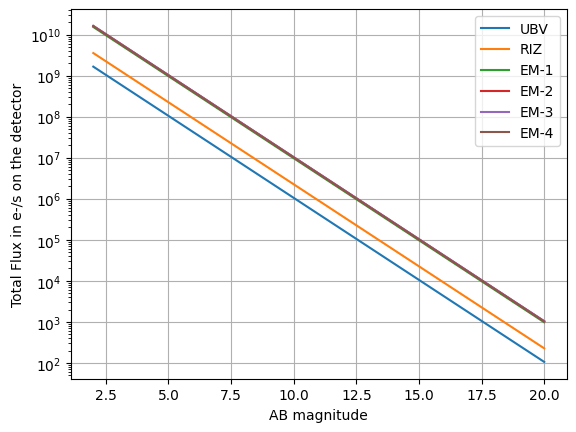

In [21]:
print(f"WL = {min(llUBV),max(llUBV)}")
print(f"minmaxmean UBV = {min(fUBVpho),max(fUBVpho),np.mean(fUBVpho)}")
print(f"minmaxmean RIZ = {min(fRIZpho),max(fRIZpho),np.mean(fRIZpho)}")
plt.semilogy(mag,fUBVpho,label="UBV")
plt.semilogy(mag,fRIZpho,label="RIZ")
plt.semilogy(mag,fEM[:,0],label="EM-1")
plt.semilogy(mag,fEM[:,1],label="EM-2")
plt.semilogy(mag,fEM[:,2],label="EM-3")
plt.semilogy(mag,fEM[:,3],label="EM-4")
plt.grid()
plt.legend()
plt.xlabel("AB magnitude")
plt.ylabel("Total Flux in e-/s on the detector")

Text(0, 0.5, 'Total Flux in e-/s on the detector')

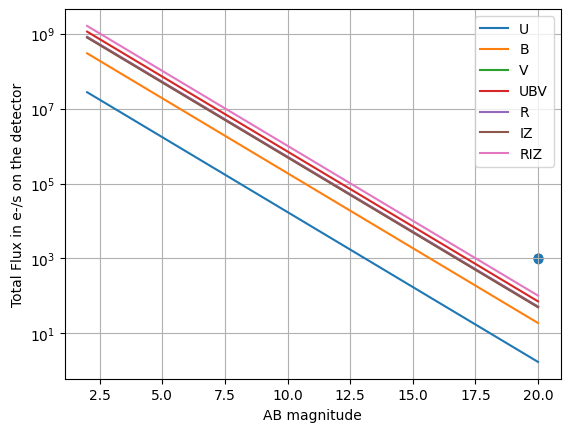

In [22]:
plt.semilogy(mag,fU,label="U")
plt.semilogy(mag,fB,label="B")
plt.semilogy(mag,fV,label="V")
plt.semilogy(mag,fUBV,label="UBV")
plt.semilogy(mag,fR,label="R")
plt.semilogy(mag,fIZ,label="IZ")
plt.semilogy(mag,fRIZ,label="RIZ")
plt.scatter(np.ones(nbins-1)*mag[-1],fEM[-1,:])
plt.grid()
plt.legend()
plt.xlabel("AB magnitude")
plt.ylabel("Total Flux in e-/s on the detector")

Text(0, 0.5, 'Flux in e-/s/pixels on the detector')

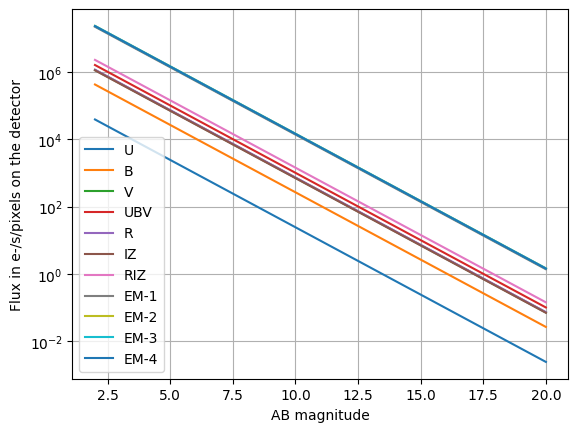

In [23]:
plt.semilogy(mag,fU/N_pixelsEM,label="U")
plt.semilogy(mag,fB/N_pixelsEM,label="B")
plt.semilogy(mag,fV/N_pixelsEM,label="V")
plt.semilogy(mag,fUBV/N_pixelsEM,label="UBV")
plt.semilogy(mag,fR/N_pixelsEM,label="R")
plt.semilogy(mag,fIZ/N_pixelsEM,label="IZ")
plt.semilogy(mag,fRIZ/N_pixelsEM,label="RIZ")
plt.semilogy(mag,fEM/N_pixelsEM,label=["EM-1","EM-2","EM-3","EM-4"])
plt.grid()
plt.legend()
plt.xlabel("AB magnitude")
plt.ylabel("Flux in e-/s/pixels on the detector")

EM exposure times at AB=2: [0.00272819 0.00257399 0.0025706  0.00261818]


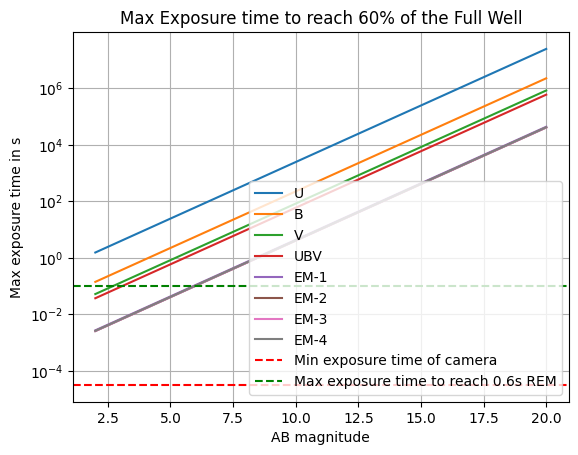

In [24]:
plt.semilogy(mag,0.6*IMXFullWell/(fU/N_pixelsEM),label="U")
plt.semilogy(mag,0.6*IMXFullWell/(fB/N_pixelsEM),label="B")
plt.semilogy(mag,0.6*IMXFullWell/(fV/N_pixelsEM),label="V")
plt.semilogy(mag,0.6*IMXFullWell/(fUBV/N_pixelsEM),label="UBV")
plt.semilogy(mag,0.6*IMXFullWell/(fEM/N_pixelsEM),label=["EM-1","EM-2","EM-3","EM-4"])
#plt.semilogy(mag,0.6*IMXFullWell/(fR/N_pixelsEM),label="R")
#plt.semilogy(mag,0.6*IMXFullWell/(fIZ/N_pixelsEM),label="IZ")
#plt.semilogy(mag,0.6*IMXFullWell/(fRIZ/N_pixelsEM),label="RIZ")
plt.axhline(32e-6,c="r",ls="--",label="Min exposure time of camera")
plt.axhline(0.1,c="g",ls="--",label="Max exposure time to reach 0.6s REM")
plt.grid()
plt.legend()
plt.xlabel("AB magnitude")
plt.ylabel("Max exposure time in s")
plt.title("Max Exposure time to reach 60% of the Full Well")
print(f"EM exposure times at AB=2: {0.6*IMXFullWell/(fEM[0,:]/N_pixelsEM)}")

# Computation of the SN for a 80% full well or 1s exposure

In [25]:
f_U_1s = fU.copy() / N_pixelsEM
m_U_1s = fU / N_pixelsEM > 8e4
f_U_1s[m_U_1s] = 8e4 
#texp_U_1s = np.ones(fU.shape)
#texp_U_1s[m_U_1s] = 0.8*IMXFullWell/(fU[m_U_1s]/N_pixelsEM)
texp_U_1s = 0.8*IMXFullWell/(fU/N_pixelsEM)

f_B_1s = fB.copy() / N_pixelsEM
m_B_1s = fB / N_pixelsEM > 8e4
f_B_1s[m_B_1s] = 8e4 
#texp_B_1s = np.ones(fB.shape)
#texp_B_1s[m_B_1s] = 0.8*IMXFullWell/(fB[m_B_1s]/N_pixelsEM)
texp_B_1s = 0.8*IMXFullWell/(fB/N_pixelsEM)

f_V_1s = fV.copy() / N_pixelsEM
m_V_1s = fV / N_pixelsEM > 8e4
f_V_1s[m_V_1s] = 8e4 
#texp_V_1s = np.ones(fV.shape)
#texp_V_1s[m_V_1s] = 0.8*IMXFullWell/(fV[m_V_1s]/N_pixelsEM)
texp_V_1s = 0.8*IMXFullWell/(fV/N_pixelsEM)

f_UBV_1s = fUBV.copy() / N_pixelsEM
m_UBV_1s = fUBV / N_pixelsEM > 8e4
f_UBV_1s[m_UBV_1s] = 8e4
#texp_UBV_1s = np.ones(fUBV.shape)
#texp_UBV_1s[m_UBV_1s] = 0.8*IMXFullWell/(fUBV[m_UBV_1s]/N_pixelsEM)
texp_UBV_1s = 0.8*IMXFullWell/(fUBV/N_pixelsEM)

f_R_1s = fR.copy() / N_pixelsEM
m_R_1s = fR / N_pixelsEM > 8e4
f_R_1s[m_R_1s] = 8e4 
#texp_R_1s = np.ones(fR.shape)
#texp_R_1s[m_R_1s] = 0.8*IMXFullWell/(fR[m_R_1s]/N_pixelsEM)
texp_R_1s = 0.8*IMXFullWell/(fR/N_pixelsEM)


f_IZ_1s = fIZ.copy() / N_pixelsEM
m_IZ_1s = fIZ / N_pixelsEM > 8e4
f_IZ_1s[m_IZ_1s] = 8e4
#texp_IZ_1s = np.ones(fIZ.shape)
#texp_IZ_1s[m_IZ_1s] = 0.8*IMXFullWell/(fIZ[m_IZ_1s]/N_pixelsEM)
texp_IZ_1s = 0.8*IMXFullWell/(fIZ/N_pixelsEM)

f_RIZ_1s = fRIZ.copy() / N_pixelsEM
m_RIZ_1s = fRIZ / N_pixelsEM > 8e4
f_RIZ_1s[m_RIZ_1s] = 8e4
#texp_RIZ_1s = np.ones(fRIZ.shape)
#texp_RIZ_1s[m_RIZ_1s] = 0.8*IMXFullWell/(fRIZ[m_RIZ_1s]/N_pixelsEM)
texp_RIZ_1s = 0.8*IMXFullWell/(fRIZ/N_pixelsEM)

f_EM_1s = fEM.copy() / N_pixelsEM
m_EM_1s = fEM / N_pixelsEM > 8e4
f_EM_1s[m_EM_1s] = 8e4
texp_EM_1s = 0.8 * IMXFullWell / ( fEM / N_pixelsEM )

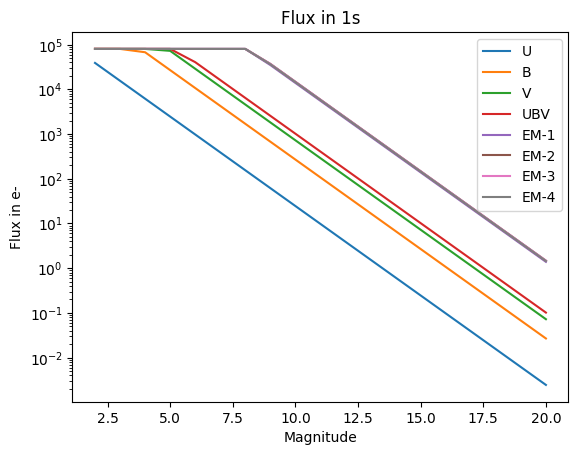

In [26]:
plt.semilogy(mag,f_U_1s,label = "U")
plt.semilogy(mag,f_B_1s,label = "B")
plt.semilogy(mag,f_V_1s,label = "V")
plt.semilogy(mag,f_UBV_1s,label = "UBV")
plt.semilogy(mag,f_EM_1s,label=["EM-1","EM-2","EM-3","EM-4"])
plt.xlabel("Magnitude")
plt.ylabel("Flux in e-")
plt.title("Flux in 1s")
plt.legend()

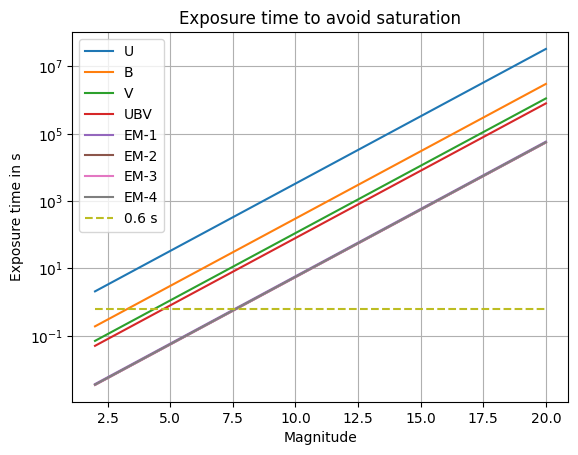

In [27]:
plt.semilogy(mag,texp_U_1s,label="U")
plt.semilogy(mag,texp_B_1s,label="B")
plt.semilogy(mag,texp_V_1s,label="V")
plt.semilogy(mag,texp_UBV_1s,label="UBV")
plt.semilogy(mag,texp_EM_1s,label=["EM-1","EM-2","EM-3","EM-4"])
plt.plot([2,20],[0.6,0.6],ls='--',label="0.6 s")
plt.xlabel("Magnitude")
plt.ylabel("Exposure time in s")
plt.title("Exposure time to avoid saturation")
plt.grid(which='both')
plt.legend()

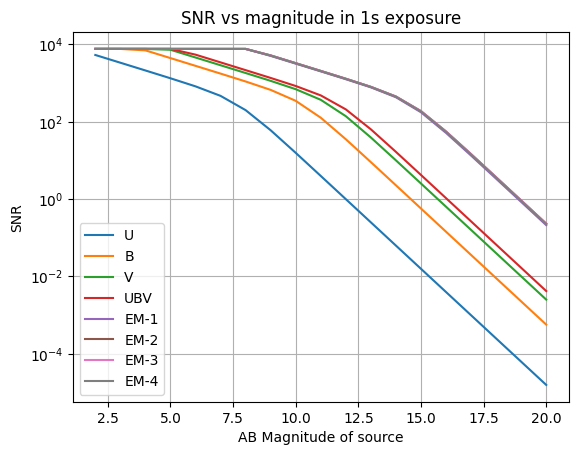

In [28]:
SU = f_U_1s * N_pixelsEM
SskyU = skfU / N_pixelsEM * texp_U_1s
NU = np.sqrt( SU + SskyU + IMXDARK**2 * N_pixelsEM * texp_U_1s + IMXRON**2 * N_pixelsEM)

SB = f_B_1s * N_pixelsEM
SskyB = skfB / N_pixelsEM * texp_B_1s
NB = np.sqrt( SB + SskyB + IMXDARK**2 * N_pixelsEM * texp_B_1s + IMXRON**2 * N_pixelsEM)

SV = f_V_1s * N_pixelsEM
SskyV = skfV / N_pixelsEM * texp_V_1s
NV = np.sqrt( SV + SskyV + IMXDARK**2 * N_pixelsEM * texp_V_1s + IMXRON**2 * N_pixelsEM)

SUBV = f_UBV_1s * N_pixelsEM
SskyUBV = skfUBV / N_pixelsEM * texp_UBV_1s
NUBV = np.sqrt( SUBV + SskyUBV + IMXDARK**2 * N_pixelsEM * texp_UBV_1s + IMXRON**2 * N_pixelsEM)

SEM = f_EM_1s * N_pixelsEM
SskyEM = skEM / N_pixelsEM * texp_EM_1s
NEM = np.sqrt( SEM + SskyEM + IMXDARK**2 * N_pixelsEM * texp_EM_1s + IMXRON**2 * N_pixelsEM)

plt.semilogy(mag,SU/NU,label="U")
plt.semilogy(mag,SB/NB,label="B")
plt.semilogy(mag,SV/NV,label="V")
plt.semilogy(mag,SUBV/NUBV,label="UBV")
plt.semilogy(mag,SEM/NEM,label=["EM-1","EM-2","EM-3","EM-4"])
plt.xlabel("AB Magnitude of source")
plt.ylabel("SNR")
plt.title("SNR vs magnitude in 1s exposure")
plt.grid(which='both')
plt.legend()

# Exposure BaryCenter Time : MTE vs SNR

Mean Time of Exposure (MTE)

$$ MTE = \frac{\int_0^T{t flux(t)dt}}{\int_0^T{flux(t)dt}} $$

As we will have discrete exposure times:

$$ MTE = \frac{\sum_0^T{t_i flux(t_i)}}{\sum_0^T{flux(ti)}} = \frac{A}{B}$$

if we suppose a negligible error on time measurement, then only the flux measurement noise is important.

$A = \sum_0^T{t_i flux(t_i)} \pm \sqrt{\sum{(t_i \sigma_i)^2}}$ 

$B = \sum_0^T{flux(t_i)} \pm \sqrt{\sum{\sigma_i^2}}$ 

$$\sigma_{MTE} = \frac{\sqrt{\sum{(t_i sigma_i)^2}}}{\sum_0^T{flux(t_i)}} + \frac{\sum_0^T{t_i flux(t_i)}}{{\sum_0^T{flux(ti)}}^2} \sqrt{\sum{\sigma_i^2}}  $$

if we suppose that $\sigma_i = \sigma$  are constant, that T = N $\Delta$ T

$$\sigma_B = \sigma\sqrt{N}$$

$$\sigma_A = \sigma\sqrt{{{N^3}\over{3}}-{{N^2}\over{2}}+{{N}\over{6}}}$$


$$\sigma_{MTE} = \frac{\Delta T \sigma \sqrt{{{N^3}\over{3}}-{{N^2}\over{2}}+{{N}\over{6}}}}{B} + \frac{A}{B^2} \sqrt{N} \sigma $$



To have error constant one needs to have the flux constant $f_0$.

Thus :

$$ A = {{{\it \Delta T}\,\left(N-1\right)\,N\,f_{0}}\over{2}}$$

$$ B = f_0 N $$

$$\sigma_{MTE} = {{{\Delta T \sigma}\,\left(2\,\sqrt{N}\,\sqrt{N\,\left(2\,N^2-3\,N+1\right)} +\sqrt{6}\,N^2-\sqrt{6}\,N\right)}\over{2\,\sqrt{6}\,N^{{{3}\over{2}}}\,f_{0}}}$$

$$\sigma_{MTE} = {\Delta T \sigma\over{f_0}} {{\,\left(2\,\sqrt{N}\,\sqrt{N\,\left(2\,N^2-3\,N+1\right)} +\sqrt{6}\,N^2-\sqrt{6}\,N\right)}\over{2\,\sqrt{6}\,N^{{{3}\over{2}}}}}$$


if $\Delta T$ = 1 s, N = 300 in order to reach $\sigma_{MTE}$ = 0.6s one needs the SNR = $\frac{f_0}{\sigma}$ to be :

In [29]:
n = 300
SNR = 1/0.6*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5)
print(f"minimum SNR required 0.6s {SNR}")

minimum SNR required 0.6s 31.010638405766276


In [30]:
n=3000
SNR = 0.1/0.6*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5)
print(f"minimum SNR required 0.6s {SNR}")

minimum SNR required 0.6s 9.831978327278529


there is a bias in the barycenter formula

In [31]:
f = np.ones(300)
ni = np.arange(300)
tr = []
for i in range(10000):
    br = np.random.randn(300)*1/31
    sum(ni*f+br)/sum(f+br)
    tr.append(sum(ni*f+br)/sum(f+br))

In [32]:
sum(ni*f)/sum(f)

149.5

In [33]:
np.std(tr)

0.27671450073353193

There is a factor ~2 in the formula (corrected bellow but not clear why)

# Practical Case

we condisder to have n measurements over 1h

<>:153: SyntaxWarning: invalid escape sequence '\s'
<>:153: SyntaxWarning: invalid escape sequence '\s'
/var/folders/jq/9k8h0l2n6rl1pxs_r_38wnr40000gp/T/ipykernel_35329/4134763486.py:153: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\sigma_{MTE}$ in s")


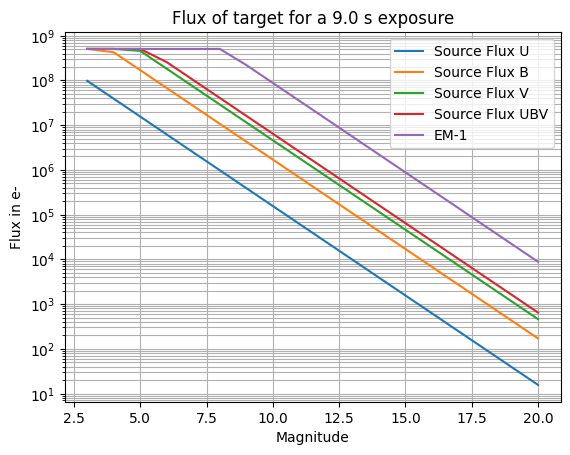

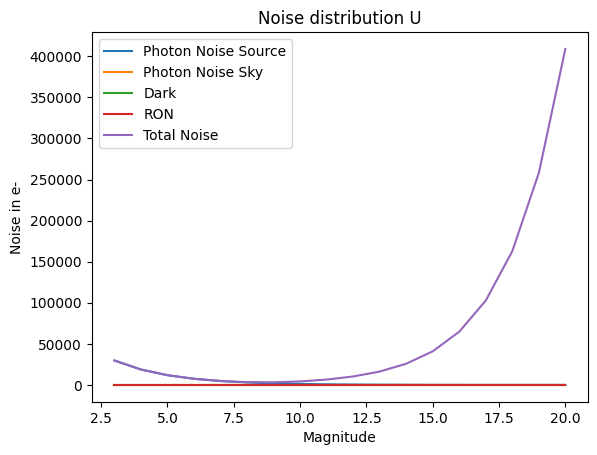

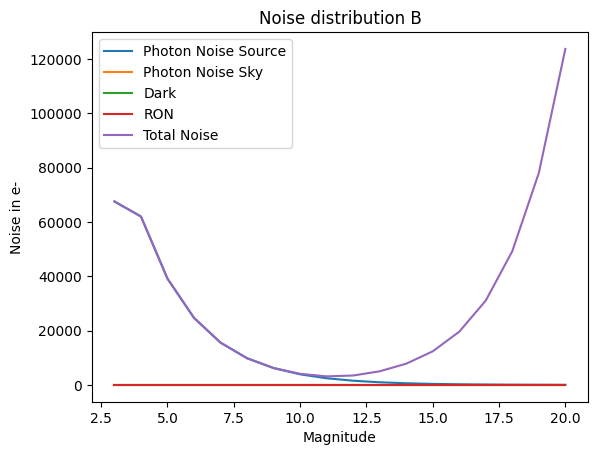

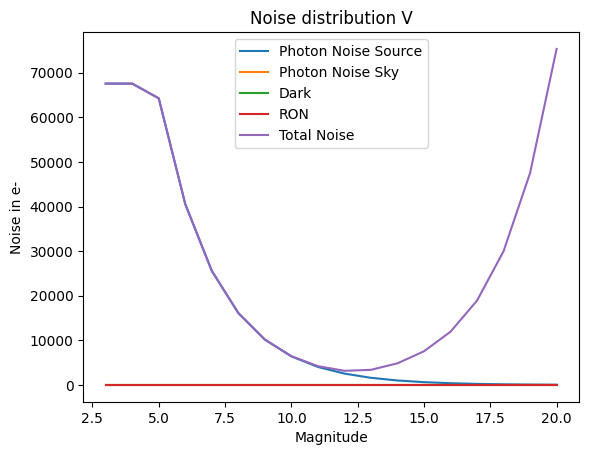

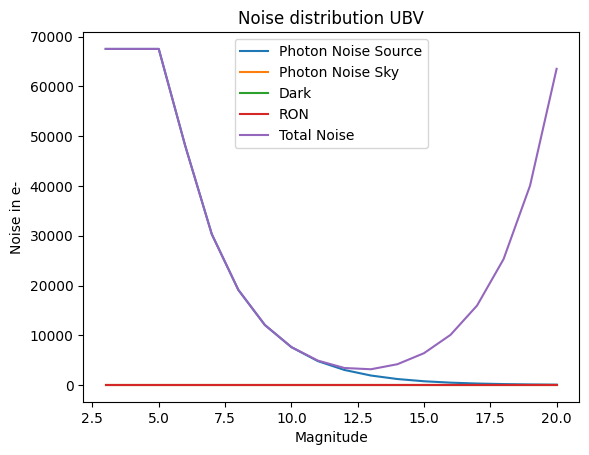

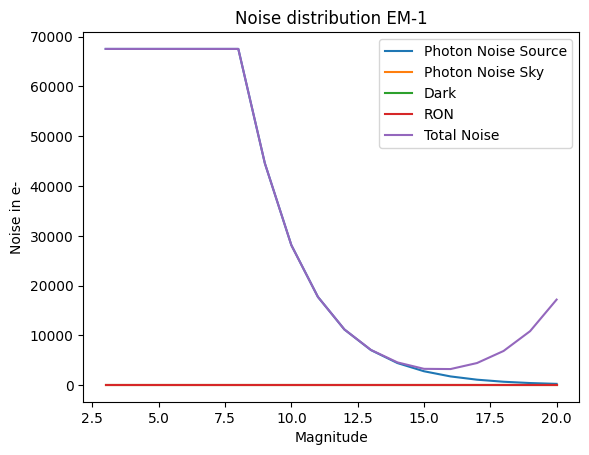

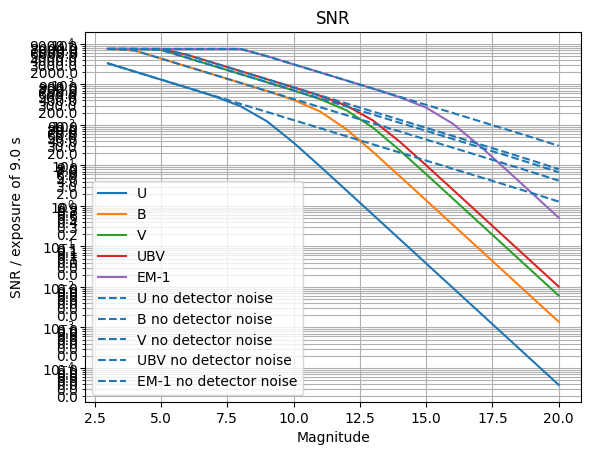

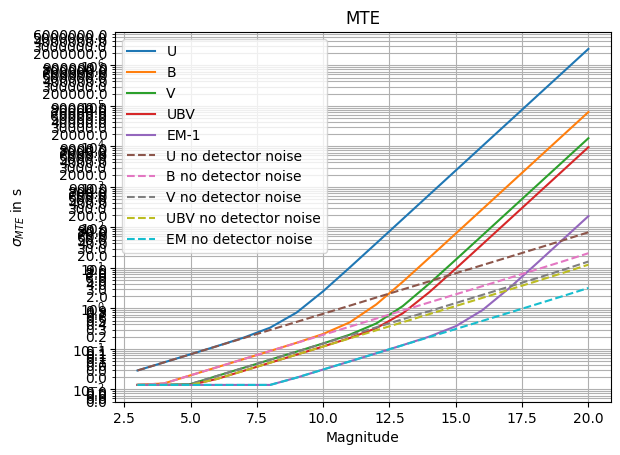

In [34]:
n = 400

texp = 3600 / n

SU = f_U_1s * N_pixelsEM * texp
SskyU = skfU * texp
NU = np.sqrt( SU*texp + SskyU*texp + (IMXDARKm20*texp)**2 * N_pixelsEM * texp_U_1s + IMXRON**2 * N_pixelsEM)
NU_nodet = np.sqrt( SU*texp + SskyU*texp)

SB = f_B_1s * N_pixelsEM * texp
SskyB = skfB * texp
NB = np.sqrt( SB*texp + SskyB*texp + (IMXDARKm20*texp)**2 * N_pixelsEM * texp_B_1s + IMXRON**2 * N_pixelsEM)
NB_nodet = np.sqrt( SB*texp + SskyB*texp)

SV = f_V_1s * N_pixelsEM * texp
SskyV = skfV * texp
NV = np.sqrt( SV*texp + SskyV*texp + (IMXDARKm20*texp)**2 * N_pixelsEM * texp_V_1s + IMXRON**2 * N_pixelsEM)
NV_nodet = np.sqrt( SV*texp + SskyV*texp)

SUBV = f_UBV_1s * N_pixelsEM * texp
SskyUBV = skfUBV * texp
NUBV = np.sqrt( SUBV*texp + SskyUBV*texp + (IMXDARKm20*texp)**2 * N_pixelsEM * texp_UBV_1s + IMXRON**2 * N_pixelsEM)
NUBV_nodet = np.sqrt( SUBV*texp + SskyUBV*texp)

SEM = f_EM_1s * N_pixelsEM * texp
SskyEM = skEM * texp
NEM = np.sqrt( SEM * texp + SskyEM * texp + (IMXDARKm20*texp)**2 * N_pixelsEM * texp_EM_1s + IMXRON**2 * N_pixelsEM)
NEM_nodet = np.sqrt( SEM*texp + SskyEM*texp)

plt.figure()
plt.semilogy(mag[mag>2],SU[mag>2],label="Source Flux U")
plt.semilogy(mag[mag>2],SB[mag>2],label="Source Flux B")
plt.semilogy(mag[mag>2],SV[mag>2],label="Source Flux V")
plt.semilogy(mag[mag>2],SUBV[mag>2],label="Source Flux UBV")
plt.semilogy(mag[mag>2],SEM[mag>2,0],label="EM-1")
plt.xlabel("Magnitude")
plt.ylabel("Flux in e-")
plt.legend()
plt.grid(which="both")
plt.title(f"Flux of target for a {texp} s exposure")



plt.figure()
plt.plot(mag[mag>2],np.sqrt(SU*texp)[mag>2],label="Photon Noise Source")
plt.plot(mag[mag>2],np.sqrt(SskyU*texp)[mag>2],label="Photon Noise Sky")
plt.plot(mag[mag>2],(IMXDARKm20*np.ones(fU.shape)*texp*np.sqrt(N_pixelsEM))[mag>2],label="Dark")
plt.plot(mag[mag>2],(IMXRON*np.ones(fU.shape)*np.sqrt(N_pixelsEM))[mag>2],label="RON")
plt.plot(mag[mag>2],NU[mag>2],label="Total Noise")
plt.xlabel("Magnitude")
plt.ylabel("Noise in e-")
plt.legend()
plt.title("Noise distribution U")

plt.figure()
plt.plot(mag[mag>2],np.sqrt(SB*texp)[mag>2],label="Photon Noise Source")
plt.plot(mag[mag>2],np.sqrt(SskyB*texp)[mag>2],label="Photon Noise Sky")
plt.plot(mag[mag>2],(IMXDARKm20*np.ones(fB.shape)*texp*np.sqrt(N_pixelsEM))[mag>2],label="Dark")
plt.plot(mag[mag>2],(IMXRON*np.ones(fB.shape)*np.sqrt(N_pixelsEM))[mag>2],label="RON")
plt.plot(mag[mag>2],NB[mag>2],label="Total Noise")
plt.xlabel("Magnitude")
plt.ylabel("Noise in e-")
plt.legend()
plt.title("Noise distribution B")

plt.figure()
plt.plot(mag[mag>2],np.sqrt(SV*texp)[mag>2],label="Photon Noise Source")
plt.plot(mag[mag>2],np.sqrt(SskyV*texp)[mag>2],label="Photon Noise Sky")
plt.plot(mag[mag>2],(IMXDARKm20*np.ones(fV.shape)*texp*np.sqrt(N_pixelsEM))[mag>2],label="Dark")
plt.plot(mag[mag>2],(IMXRON*np.ones(fV.shape)*np.sqrt(N_pixelsEM))[mag>2],label="RON")
plt.plot(mag[mag>2],NV[mag>2],label="Total Noise")
plt.xlabel("Magnitude")
plt.ylabel("Noise in e-")
plt.legend()
plt.title("Noise distribution V")

plt.figure()
plt.plot(mag[mag>2],np.sqrt(SUBV*texp)[mag>2],label="Photon Noise Source")
plt.plot(mag[mag>2],np.sqrt(SskyUBV*texp)[mag>2],label="Photon Noise Sky")
plt.plot(mag[mag>2],(IMXDARKm20*np.ones(fUBV.shape)*texp*np.sqrt(N_pixelsEM))[mag>2],label="Dark")
plt.plot(mag[mag>2],(IMXRON*np.ones(fUBV.shape)*np.sqrt(N_pixelsEM))[mag>2],label="RON")
plt.plot(mag[mag>2],NUBV[mag>2],label="Total Noise")
plt.xlabel("Magnitude")
plt.ylabel("Noise in e-")
plt.legend()
plt.title("Noise distribution UBV")

plt.figure()
plt.plot(mag[mag>2],np.sqrt(SEM[:,0]*texp)[mag>2],label="Photon Noise Source")
plt.plot(mag[mag>2],np.sqrt(SskyEM[:,0]*texp)[mag>2],label="Photon Noise Sky")
plt.plot(mag[mag>2],(IMXDARKm20*np.ones(fEM[:,0].shape)*texp*np.sqrt(N_pixelsEM))[mag>2],label="Dark")
plt.plot(mag[mag>2],(IMXRON*np.ones(fEM[:,0].shape)*np.sqrt(N_pixelsEM))[mag>2],label="RON")
plt.plot(mag[mag>2],NEM[mag>2,0],label="Total Noise")
plt.xlabel("Magnitude")
plt.ylabel("Noise in e-")
plt.legend()
plt.title("Noise distribution EM-1")


plt.figure()
ax = plt.subplot(111)
plt.semilogy(mag[mag>2],(SU/NU)[mag>2],label="U")
plt.semilogy(mag[mag>2],(SB/NB)[mag>2],label="B")
plt.semilogy(mag[mag>2],(SV/NV)[mag>2],label="V")
plt.semilogy(mag[mag>2],(SUBV/NUBV)[mag>2],label="UBV")
plt.semilogy(mag[mag>2],(SEM/NEM)[mag>2,0],label="EM-1")
#plt.semilogy(mag[mag>2],(SR/NR)[mag>2],label="R")
#plt.semilogy(mag[mag>2],(SIZ/NRIZ)[mag>2],label="IZ")
#plt.semilogy(mag[mag>2],(SRIZ/NRIZ)[mag>2],label="RIZ")
plt.semilogy(mag[mag>2],(SU/NU_nodet)[mag>2],label="U no detector noise",c="C0",ls="--")
plt.semilogy(mag[mag>2],(SB/NB_nodet)[mag>2],label="B no detector noise",c="C0",ls="--")
plt.semilogy(mag[mag>2],(SV/NV_nodet)[mag>2],label="V no detector noise",c="C0",ls="--")
plt.semilogy(mag[mag>2],(SUBV/NUBV_nodet)[mag>2],label="UBV no detector noise",c="C0",ls="--")
plt.semilogy(mag[mag>2],(SEM/NEM_nodet)[mag>2,0],label="EM-1 no detector noise",c="C0",ls="--")
#plt.semilogy(mag[mag>2],(SR/NR_nodet)[mag>2],label="R no detector noise",c="C0",ls="--")
#plt.semilogy(mag[mag>2],(SIZ/NRIZ_nodet)[mag>2],label="IZ no detector noise",c="C1",ls="--")
#plt.semilogy(mag[mag>2],(SRIZ/NRIZ_nodet)[mag>2],label="RIZ no detector noise",c="C2",ls="--")


plt.xlabel("Magnitude")
plt.ylabel(f"SNR / exposure of {texp} s")
plt.grid(which="both")
#plt.yticks(minor=True)
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
plt.legend()
plt.title("SNR")


#plt.semilogy(mag,f_EM_1s,label=["EM-1","EM-2","EM-3","EM-4"])

plt.figure()
ax = plt.subplot(111)
plt.semilogy(mag[mag>2],(NU/SU/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="U")
plt.semilogy(mag[mag>2],(NB/SB/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="B")
plt.semilogy(mag[mag>2],(NV/SV/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="V")
plt.semilogy(mag[mag>2],(NUBV/SUBV/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="UBV")
plt.semilogy(mag[mag>2],(NEM/SEM/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2,0],label="EM-1")
plt.semilogy(mag[mag>2],(NU_nodet/SU/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="U no detector noise",ls="--")
plt.semilogy(mag[mag>2],(NB_nodet/SB/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="B no detector noise",ls="--")
plt.semilogy(mag[mag>2],(NV_nodet/SV/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="V no detector noise",ls="--")
plt.semilogy(mag[mag>2],(NUBV_nodet/SUBV/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="UBV no detector noise",ls="--")
plt.semilogy(mag[mag>2],(NEM_nodet/SEM/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2,0],label="EM no detector noise",ls="--")
#plt.semilogy(mag[mag>2],(NR/SR/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="R")
#plt.semilogy(mag[mag>2],(NIZ/SIZ/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="IZ")
#plt.semilogy(mag[mag>2],(NRIZ/SRIZ/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="RIZ")
#plt.semilogy(mag[mag>2],(NR_nodet/SR/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="R no detector noise",c="C0",ls="--")
#plt.semilogy(mag[mag>2],(NIZ_nodet/SIZ/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="IZ no detector noise",c="C1",ls="--")
#plt.semilogy(mag[mag>2],(NRIZ_nodet/SRIZ/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="RIZ no detector noise",c="C2",ls="--")



plt.xlabel("Magnitude")
plt.ylabel("$\sigma_{MTE}$ in s")
plt.grid(which="both")
#plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
plt.title("MTE")
plt.legend()



Is 0.6 m represent 2 cm/s RV error and that this is linear then 

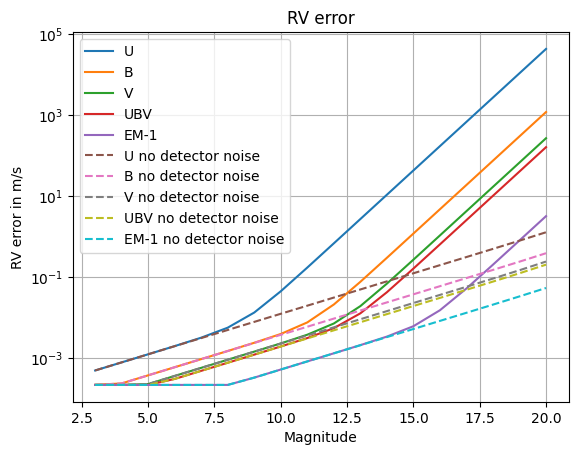

In [35]:
plt.figure()
ax = plt.subplot(111)
plt.semilogy(mag[mag>2],0.01/0.6*(NU/SU/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="U")
plt.semilogy(mag[mag>2],0.01/0.6*(NB/SB/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="B")
plt.semilogy(mag[mag>2],0.01/0.6*(NV/SV/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="V")
plt.semilogy(mag[mag>2],0.01/0.6*(NUBV/SUBV/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="UBV")
plt.semilogy(mag[mag>2],0.01/0.6*(NEM/SEM/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2,0],label="EM-1")
plt.semilogy(mag[mag>2],0.01/0.6*(NU_nodet/SU/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="U no detector noise",ls="--")
plt.semilogy(mag[mag>2],0.01/0.6*(NB_nodet/SB/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="B no detector noise",ls="--")
plt.semilogy(mag[mag>2],0.01/0.6*(NV_nodet/SV/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="V no detector noise",ls="--")
plt.semilogy(mag[mag>2],0.01/0.6*(NUBV_nodet/SUBV/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="UBV no detector noise",ls="--")
plt.semilogy(mag[mag>2],0.01/0.6*(NEM_nodet/SEM/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2,0],label="EM-1 no detector noise",ls="--")
#plt.semilogy(mag[mag>2],0.01/0.6*(NR/SR/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="R")
#plt.semilogy(mag[mag>2],0.01/0.6*(NIZ/SIZ/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="IZ")
#plt.semilogy(mag[mag>2],0.01/0.6*(NRIZ/SRIZ/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="RIZ")
#plt.semilogy(mag[mag>2],0.01/0.6*(NR_nodet/SR/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="R no detector noise",c="C0",ls="--")
#plt.semilogy(mag[mag>2],0.01/0.6*(NIZ_nodet/SIZ/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="IZ no detector noise",c="C1",ls="--")
#plt.semilogy(mag[mag>2],0.01/0.6*(NRIZ_nodet/SRIZ/2*texp*(2*np.sqrt(n)*np.sqrt(n*(2*n**2-3*n+1))+np.sqrt(6)*(n**2-n))/(2*np.sqrt(6)*n**1.5))[mag>2],label="RIZ no detector noise",c="C2",ls="--")
plt.xlabel("Magnitude")
plt.ylabel("RV error in m/s")
plt.grid(which="both")
plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
#ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
plt.title("RV error")
plt.legend()